In [1]:
from numpy.random import RandomState
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
import numpy as np
import pandas as pd

# Load the file into Pandas

In [9]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

columns=['age','workclass','fnlwgt','education','education-num','marital-status'
                ,'occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week'
                ,'native-country','label']

In [10]:
# loading dataset into Pandas DataFrame
df = pd.read_csv(url,names=columns)

In [12]:
#Checking the data in the data frame
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
#Check the num of rows and coulmns
df.shape
print(f"shape of the DataFrame is : {df.shape}")
print(f"Rows : {df.shape[0]} \nColumns : {df.shape[1]}")

shape of the DataFrame is : (32561, 15)
Rows : 32561 
Columns : 15


In [14]:
#Statistical Information - Describing all columns of a DataFrame regardless of data type.
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# Data Exploration & Visualization

In [15]:
#Check for the nulls or missing values in the dataset
#returns TRUE if there is at least single data point which is true for checked condition.
df.isnull().values.any()

False

In [16]:
#Taking the count of Null /NAN in each column
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
label             0
dtype: int64

In [17]:
#Find the unique values for the column marital status
df['marital-status'].unique().tolist()

[' Never-married',
 ' Married-civ-spouse',
 ' Divorced',
 ' Married-spouse-absent',
 ' Separated',
 ' Married-AF-spouse',
 ' Widowed']

In [18]:
#For each unique values in the column what are the counts for each of them
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [19]:
#For each unique values in the column what are the counts for each of them
df['label'].value_counts()

 <=50K    24720
 >50K      7841
Name: label, dtype: int64

In [20]:
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

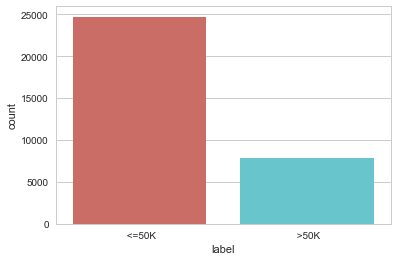

In [21]:
#Visualize the target - Salary (Label) count
import matplotlib.pyplot as plt
sns.countplot(x='label',data=df, palette='hls')
plt.show()

In [22]:
#Get the mean across each column on grouping by eductaion num
df.groupby('education-num').mean()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
education-num,,,,,
1,42.764706,235889.372549,898.392157,66.490196,36.647059
2,46.142857,239303.000000,125.875000,48.327381,38.255952
3,42.885886,232448.333333,176.021021,68.252252,38.897898
4,48.445820,188079.171827,233.939628,65.668731,39.366873
5,41.060311,202485.066148,342.089494,28.998054,38.044747
6,37.429796,196832.465166,404.574491,56.845659,37.052519
7,32.355745,194928.077447,215.097872,50.079149,33.925957
8,32.000000,199097.508083,284.087760,32.337182,35.780600
9,38.974479,189538.739739,576.800114,70.466622,40.575374


C:\Users\a481264\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


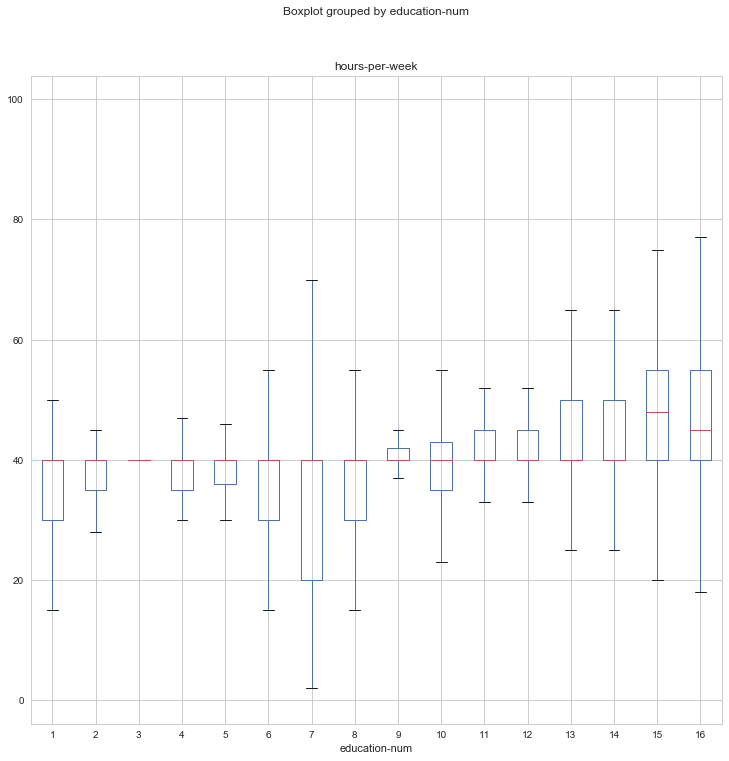

In [23]:
#Plotting the column (to plot) which should be numeric and column to split upon by
%matplotlib inline
df.boxplot(column='hours-per-week', by = 'education-num',figsize=(12,12))

In [25]:
#Get the mean across each column on grouping by fnlwgt num
df.groupby('fnlwgt').mean()

,age,education-num,capital-gain,capital-loss,hours-per-week
fnlwgt,,,,,
12285,25.000000,10.0,0.0,0.0,20.000000
13769,23.000000,10.0,0.0,0.0,30.000000
14878,46.000000,15.0,0.0,0.0,40.000000
18827,26.000000,10.0,0.0,0.0,40.000000
19214,25.000000,9.0,0.0,0.0,40.000000
19302,30.800000,11.4,1978.0,0.0,44.400000
19395,27.500000,10.0,0.0,0.0,36.500000
19410,24.000000,9.0,0.0,0.0,48.000000
19491,31.000000,10.0,0.0,0.0,40.000000


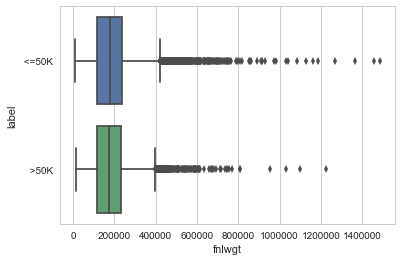

In [26]:
sns.boxplot(x="fnlwgt", y="label", data=df)

## Data Pre-processing - Handing categorical variables and missing values including outliers

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
label             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [28]:
#Identifying the Categorical Features
print(df.select_dtypes(include=['object']).columns.values)

['workclass' 'education' 'marital-status' 'occupation' 'relationship'
 'race' 'sex' 'native-country' 'label']


In [29]:
#Identifying the numerical Features
print(df.select_dtypes(include=['float64', 'int64']).columns.values)

['age' 'fnlwgt' 'education-num' 'capital-gain' 'capital-loss'
 'hours-per-week']


In [30]:
#missing data analysis by finding the total count of nulls(NAN) in each column and their percentage
#there should be no missing values
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())).sort_values(ascending=False)
all_data_na = ((df.isnull().sum() / len(df)) * 100).sort_values(ascending=False)
missing_data = pd.concat([total, percent,all_data_na], axis=1, keys=['Total', 'Percent','Missing Ratio'])
missing_data.head(42)

,Total,Percent,Missing Ratio
label,0,0.0,0.0
native-country,0,0.0,0.0
hours-per-week,0,0.0,0.0
capital-loss,0,0.0,0.0
capital-gain,0,0.0,0.0
sex,0,0.0,0.0
race,0,0.0,0.0
relationship,0,0.0,0.0
occupation,0,0.0,0.0
marital-status,0,0.0,0.0


In [31]:
df.shape

(32561, 15)

In [32]:
#Check for total number of duplicated rows /records
df.duplicated().any().sum()

1

In [33]:
#Keep a copy of the original dataframe
df_copy=df.copy()

In [34]:
# it will output True if entire row is duplicated 
#This checks if the whole row appears elsewhere with the same values in each column
df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
32531    False
32532    False
32533    False
32534    False
32535    False
32536    False
32537    False
32538    False
32539    False
32540    False
32541    False
32542    False
32543    False
32544    False
32545    False
32546    False
32547    False
32548    False
32549    False
32550    False
32551    False
32552    False
32553    False
32554    False
32555    False
32556    False
32557    False
32558    False
32559    False
32560    False
Length: 32561, dtype: bool

In [35]:
#Check for the duplicated rows 
df.loc[df.duplicated(keep='first'), :]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [36]:
#Remove the deuplicate
if df.duplicated().any().sum() :
    df.drop_duplicates(keep='first',inplace=True)
    print(f"\nshape of the new dataframe after removal of duplicate entries : {df.shape}")


shape of the new dataframe after removal of duplicate entries : (32537, 15)


In [37]:
#Handling the categorical variables using get_dummies and dropping extra dummy variables
df1 = pd.get_dummies(df,drop_first=True)

In [38]:
#Shape of new dataframe after handling categorical variables
print(f"\nshape of the new dataframe after handling categorical variables : {df1.shape}")


shape of the new dataframe after handling categorical variables : (32537, 101)


# Importing the dataset

In [39]:
df1.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,label_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [40]:
#Rename the specific column in python:
df1.rename(columns={'label_ >50K': 'Salary'}, inplace=True)

In [41]:
#Split dataframe into df_x and df_y
X = df1.drop(['Salary'], 1)
y = df1['Salary']

In [42]:
#Check the DV 
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
#Shape of DV
X.shape
print(f"\nshape of the new dataframe independant variables : {X.shape}")


shape of the new dataframe independant variables : (32537, 100)


In [44]:
#Shape of Target variable
y.shape
print(f"\nshape of the new dataframe target/dependent variables : {y.shape}")


shape of the new dataframe target/dependent variables : (32537,)


# Dataset Validation

In [45]:
from sklearn.cross_validation import train_test_split
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
test_size=validation_size, random_state=seed)

C:\Users\a481264\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Scaler Function


In [46]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Generic Function to Fit the models

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score   #For K-fold cross validation
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

In [48]:
def classification_model(model, predictors, outcome):
  
  
  #Fit the model:
  model.fit(predictors,outcome)

  #Make predictions on training set:
  predictions = model.predict(predictors)

  #Print accuracy
  accuracy = accuracy_score(outcome,predictions)
  print('Accuracy on training set :{:.2f}'.format(accuracy) )


  #Perform k-fold cross-validation with 5 folds
  results = []
    
  #for  models in model:
  kfold = model_selection.KFold(n_splits=5, random_state=7)
  cv_results = model_selection.cross_val_score(model, predictors, outcome, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  print('Cross validation Accuracy :{:.2f}'.format(cv_results.mean())) 
   


  


# Apply Model on Training and Test Dataset 

In [49]:
#Logistic Regression
model=LogisticRegression(random_state = 0)
classification_model(model, X_train,Y_train)
#model.fit(X_train, Y_train)

Accuracy on training set :0.85
Cross validation Accuracy :0.85


In [50]:
#Decision tress Classifier
model=DecisionTreeClassifier(min_samples_split=20, random_state=55)
classification_model(model, X_train,Y_train)

Accuracy on training set :0.92
Cross validation Accuracy :0.83


In Decison tree classifier we observed that the accuracy is high but the cross validation score is lower. 
So this is a case of over-fitting.The model didnot generalize well.We again train the model by selecting the max features and check the score

In [51]:
model=DecisionTreeClassifier(min_samples_split=30, random_state=55,max_features=30)
classification_model(model, X_train,Y_train)

Accuracy on training set :0.90
Cross validation Accuracy :0.84


Even with selecting max features the model didnot generalize well and it is still overfitting

In [52]:
#Random Forest Classifier
model=RandomForestClassifier(criterion='entropy',max_depth=30,min_samples_split=35, random_state=55)
classification_model(model, X_train,Y_train)

Accuracy on training set :0.89
Cross validation Accuracy :0.86


In [199]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
classification_model(model, X_train,Y_train)

Accuracy on training set :0.86
Cross validation Accuracy :0.82


# Generic Function to prepare Confusion Matrix,Classification Report and ROC Curve for a model

In [160]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [167]:
def model_confusion_matrix(model,Test_Predictor,Test_Outcome):
    #Prdicted values of X_Test
    model_pred = model.predict(Test_Predictor)
    
    #Confusion matrix of the Predicted value and actual tested value
    
    model_cm = confusion_matrix(Test_Outcome, model_pred)
    print(f" The confusion matrix for model : { model_cm}")
    
    confusion_df = pd.DataFrame(model_cm,
             columns=["Predicted Sal " + str(class_name) for class_name in ['<=50k','>50k']],
             index = ["Actual Sal " + str(class_name) for class_name in ['<=50k','>50k']])
    
    print(f" The confusion matrix for model : \n { confusion_df}")
    #score of the model
    ac=model.score(Test_Predictor, Test_Outcome)
    
    print(f"Accuracy score of the model : {ac}")
    
    

In [176]:
def test(model,predictors,outcome):
    print(classification_report(outcome,model.predict(predictors)))

# Apply Model on Test Dataset

In [177]:
#Logistic Regression
model=LogisticRegression(random_state = 0)
classification_model(model, X_test,Y_test)
model_confusion_matrix(model,X_test,Y_test)
#print(classification_report(Y_test,model.predict(X_test)))
test(model,X_test,Y_test)

Accuracy on training set :0.85
Cross validation Accuracy :0.85
 The confusion matrix for model : [[4624  335]
 [ 630  919]]
 The confusion matrix for model : 
                   Predicted Sal <=50k  Predicted Sal >50k
Actual Sal <=50k                 4624                 335
Actual Sal >50k                   630                 919
Accuracy score of the model : 0.8517209588199139
             precision    recall  f1-score   support

          0       0.88      0.93      0.91      4959
          1       0.73      0.59      0.66      1549

avg / total       0.85      0.85      0.85      6508



In [178]:
#Decision tress Classifier
model=DecisionTreeClassifier(min_samples_split=25, random_state=55)
classification_model(model, X_test,Y_test)
model_confusion_matrix(model,X_test,Y_test)
test(model,X_test,Y_test)

Accuracy on training set :0.91
Cross validation Accuracy :0.82
 The confusion matrix for model : [[4776  183]
 [ 394 1155]]
 The confusion matrix for model : 
                   Predicted Sal <=50k  Predicted Sal >50k
Actual Sal <=50k                 4776                 183
Actual Sal >50k                   394                1155
Accuracy score of the model : 0.911339889366933
             precision    recall  f1-score   support

          0       0.92      0.96      0.94      4959
          1       0.86      0.75      0.80      1549

avg / total       0.91      0.91      0.91      6508



In [194]:
#Random Forest Classifier
model=RandomForestClassifier(criterion='entropy',max_depth=30,min_samples_split=35, random_state=55)
classification_model(model, X_test,Y_test)
model_confusion_matrix(model,X_test,Y_test)
test(model,X_test,Y_test)

Accuracy on training set :0.89
Cross validation Accuracy :0.85
 The confusion matrix for model : [[4756  203]
 [ 511 1038]]
 The confusion matrix for model : 
                   Predicted Sal <=50k  Predicted Sal >50k
Actual Sal <=50k                 4756                 203
Actual Sal >50k                   511                1038
Accuracy score of the model : 0.8902888752304856
             precision    recall  f1-score   support

          0       0.90      0.96      0.93      4959
          1       0.84      0.67      0.74      1549

avg / total       0.89      0.89      0.89      6508



# Model Performance based on AUC - ROC  curve

In [180]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

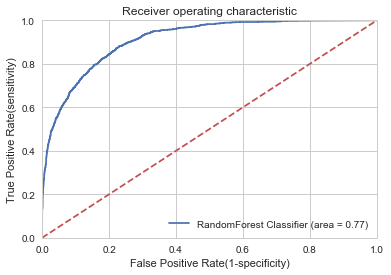

In [198]:
##https://github.com/justmarkham/scikit-learn-videos/blob/master/09_classification_metrics.ipynb
model=RandomForestClassifier(criterion='entropy',max_depth=30,min_samples_split=35, random_state=55)
model.fit(X_train,Y_train)
logit_roc_auc = roc_auc_score(Y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate(1-specificity)')
plt.ylabel('True Positive Rate(sensitivity)')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

From the above confusion matrix and AUC ,we see that the classification accuracy -that is how often the classifier
predicts correctly is 85% for the Random classifier.Based on the AUC of the classifier =77%

# Conclusion

 Based on the above analysis ,the Random Forest Classifier is the best model to predict the annual income on the 
census beareu database